# The Sparks Foundation - Data Science and Bussiness Analytics

## Prediction Of Scores Using Simple Linear Regression

### `Objective: To Predict Scores of Students based on their study hours`.

##### Created and Summarized by Akanksha Saraswat

In [2]:
# Load the basic libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load and read the dataset
df=pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()  # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## **Descriptive Summary**

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


### **Insights**

* Everyone studys for minimum of 1 hour and each one scores more than 17 percent.

* This is a very small dataset, less than 30 rows so we have to check whether it is normally distributed or not.

* Since there is not much difference in mean and median, so we can assume data follows normal distribution.

* As we can see above in the table; Scores (target variable) shows high variation in data points and more spread of the data.

### **Visually Analysis of Data Disrtibution and LR Assumptions**

**Assumption: Data is normal.**

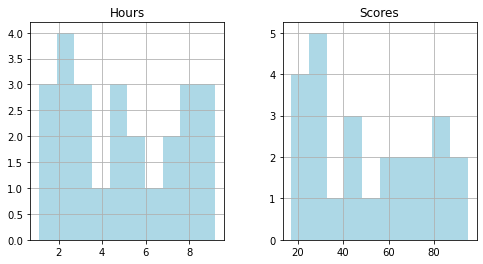

In [6]:
plt.rcParams['figure.figsize'] =[8,4]
df.hist(color='lightblue');

<AxesSubplot:>

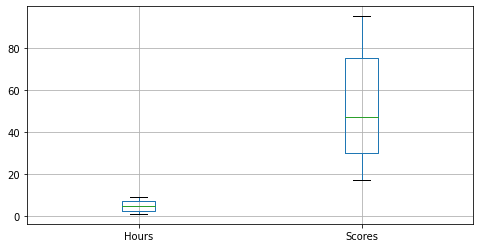

In [7]:
df.boxplot()
# there are no outliers present in the dataset, if there were we can remove it using iqr . 

**Assumption: Data Follows Linearity**

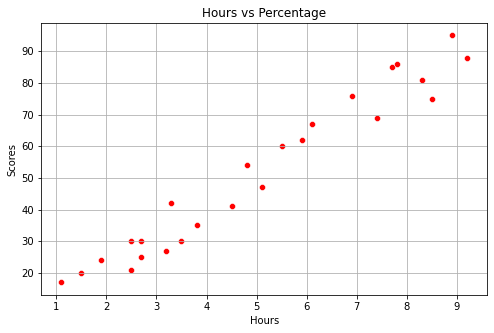

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(df['Hours'],df['Scores'] , color = 'red')  
plt.title('Hours vs Percentage')  
plt.grid();   


### Conclusion
**From the graphs above, we can clearly see that the data is normally distributed and there is a positive linear relation between the number of hours studied and percentage of score.**

# Modelling

In [9]:
# import ml libraries
import statsmodels.api as sma
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [10]:
X=df['Hours']
y=df['Scores']
Xc=sma.add_constant(X)

In [11]:
X.shape,Xc.shape

((25,), (25, 2))

In [12]:
X_train,X_test,y_train,y_test=train_test_split(Xc,y, test_size=0.3 , random_state= 0)

In [13]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((17, 2), (8, 2), (17,), (8,))

## `Building Base Model using OLS Method`

In [14]:
ols1=sma.OLS(y_train,X_train).fit()
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     276.3
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           4.52e-11
Time:                        03:41:09   Log-Likelihood:                -53.493
No. Observations:                  17   AIC:                             111.0
Df Residuals:                      15   BIC:                             112.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3708      3.481      0.681      0.506      -5.048       9.790
Hours          9.7886      0.589     16.621      0.000       8.533      11.044
==============================================================================
Omnibus:                        4.659   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                1.510
Skew:                          -0.211   Prob(JB):                        0.470
Kurtosis:                       1.602   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Train Accuracy and RMSE

In [15]:
ypred_train=ols1.predict(X_train)

In [16]:
train_score,train_rmse=r2_score(y_train,ypred_train) , np.sqrt(mean_squared_error(y_train,ypred_train))
train_score,train_rmse

(0.9484997422695115, 5.627830870119195)

## Test Accuracy and RMSE

In [17]:
ypred=ols1.predict(X_test)

In [18]:
test_score,test_rmse=r2_score(y_test,ypred) , np.sqrt(mean_squared_error(y_test,ypred))
test_score,test_rmse

(0.9568211104435258, 4.792191274636314)

### Probability Plot Of the Residuals

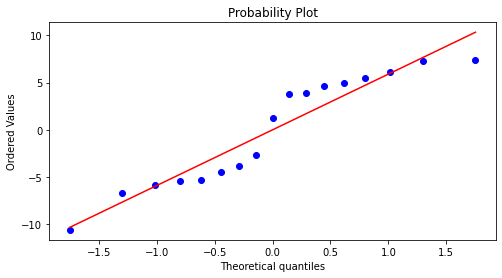

In [19]:
from scipy.stats import probplot
probplot(ols1.resid,plot=plt)
plt.show()

**Assumption Residuals are normally distributed with mean 0 .**

In [20]:
np.mean(ols1.resid)  

-2.7167810484945008e-14

The mean value of residuals is so small that we can assume it to be zero only .

# `Base Model Conclusion`
.

* The model seems to be a good fit since the  "`TEST r2_square > TRAIN r2_square`" ,** 

* Also RMSE (root mean sqaured error) has reduced by one point for the test data which leads to more precise predicted values.**

* Out of 100 observations the model will be able to predict 96 scores accurately with the standard deviation of the error 4.8 for the predicted values.**  
.

*Further steps: Ensembling , Boosting and Regularization techniques can be used for better accuracy and lesser rmse .*

---

### Cross Validation Score

**Why We use Cross-Validation Method** : Our aim is to build a model that generalize well in all possible groups of data and not just in that particular group of data that is present in our test set. This can be possible using Cross Validation.
For a model to generalize well, your cross-validation results and your test results should be high.

In [21]:
X=df['Hours']
y=df['Scores']
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3 , random_state= 0)
X_train=X_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)

In [22]:
ols2 = LinearRegression()
ols2.fit(X_train,y_train)
ols_cv_mse = cross_val_score(ols2, X_train, y_train, scoring='neg_mean_squared_error', cv=3)
ols_cv_mse.mean()
# The below number is the neg avg MSE for cv (minimizing MSE is equivalent to maximizing the neg MSE)

-38.558832568925624

**Cross-Validation Results**

In [24]:
score=cross_val_score(ols2,X_train,y_train , scoring='r2' , cv=3)
print(np.mean(score))

0.9375721183131133


**The average score is 0.94 and neagtive rmse is higher which is good for the model .**

---

## `Time For Prediction `
Now that we have trained our algorithm, let's make some predictions.

###  What will be the predicted score if a student studies 9.5 hrs a day?

In [25]:
hours=9.25

In [26]:
prediction=np.rint(ols2.predict([[hours]])).flatten()[0]
prediction

93.0

In [27]:
print("Predicted Score for 9.25 hrs studies = {}".format(prediction),"%")

Predicted Score for 9.25 hrs studies = 93.0 %


In [28]:
# Predicted Range Of Score for 9.25 hours studies :
max_value=np.rint(test_rmse+prediction)
min_value=np.rint(prediction-test_rmse)

In [29]:
Pred=pd.DataFrame({'Hours':hours, 'Predicted Score':prediction , "Min":min_value, "Max":max_value}, index=[0])
Pred

,Hours,Predicted Score,Min,Max
0,9.25,93.0,88.0,98.0


---------------------------------------------------------------------------------------  **Thank You** -------------------------------------------------------------------------------------------------